In [ ]:
import torch


In [ ]:
x = torch.tensor([[1,2,3], [4,5,6]])
print(x.shape)
print(x.size())
print(x.ndimension())
x = torch.unsqueeze(x, 0)
print(x.shape)
x = x.view(2,3)
print(x)
x = x.view(6)
print(x)


torch.Size([2, 3])
torch.Size([2, 3])
2
torch.Size([1, 2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([1, 2, 3, 4, 5, 6])


In [ ]:
w = torch.randn(5, 3, dtype=torch.float)
print(w[0][0])
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
print(w.size(), ", ", x.size())
b = torch.randn(5, 2, dtype=torch.float)

# Affine 연산
wx = torch.mm(w, x)
print(wx.shape)
result = wx + b
print(result)

tensor(-0.6424)
torch.Size([5, 3]) ,  torch.Size([3, 2])
torch.Size([5, 2])
tensor([[15.0845, 16.2971],
        [-2.7006, -1.7355],
        [-0.2992,  0.6633],
        [-6.5095, -8.9425],
        [ 1.1108,  1.9461]])


In [ ]:
w = torch.tensor(1.0, requires_grad=True)
a = w*3
l = a**2 # (3w)^2 = 9w^2
# l을 w로 미분하려면 연쇄법칙을 이용하여 a와 w를 차례대로 미분해야한다.
l.backward()
print('l을 w로 미분한 값은 {}'.format(w.grad))


l을 w로 미분한 값은 3.0


In [ ]:
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

loss at 0 = 11.998573303222656
loss at 1000 = 1.1343424320220947
loss at 2000 = 0.5486496090888977
loss at 3000 = 0.3833407461643219
loss at 4000 = 0.30366528034210205
loss at 5000 = 0.2535797953605652
loss at 6000 = 0.21746893227100372
loss at 7000 = 0.18897442519664764
loss at 8000 = 0.1650189906358719
loss at 9000 = 0.14396831393241882
loss at 10000 = 0.12487863749265671
loss at 11000 = 0.10716542601585388
loss at 12000 = 0.09044766426086426
loss at 13000 = 0.07446829229593277
loss at 14000 = 0.059049949049949646
loss at 15000 = 0.04406864941120148
loss at 16000 = 0.029438531026244164
loss at 17000 = 0.02115284837782383
loss at 18000 = 0.021165279671549797
loss at 19000 = 0.02116716094315052


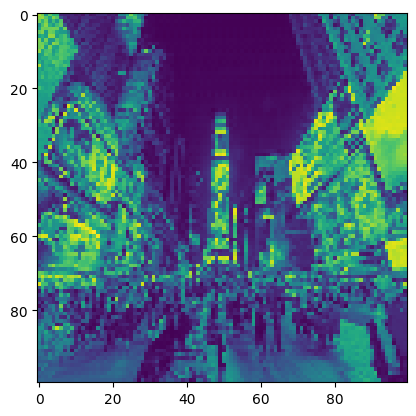

In [ ]:
# 오염된 이미지
# (hypothesis=)weird_function(random_tensor) = broken_image 하기
import torch
import pickle
import matplotlib.pyplot as plt
from google.colab import files
#uploaded = files.upload()

broken_image = torch.FloatTensor(pickle.load(open('broken_image_t.p', 'rb'), encoding='latin1')) # (10000, )
#plt.imshow(broken_image.view(100, 100))
#plt.show()

# weird_func(random_tensor)와 broken_image 사이의 오차를 구하는 함수
def distance_loss(hypothesis, broken_image):
  return torch.dist(hypothesis, broken_image) # 단순히 두 텐서의 거리로

random_tensor = torch.randn(10000, dtype=torch.float)

lr = 0.8
for i in range(0, 20000):
  random_tensor.requires_grad_(True)
  hypothesis = weird_function(random_tensor)

  loss = distance_loss(hypothesis, broken_image)
  loss.backward()

  with torch.no_grad():
    random_tensor =  random_tensor - lr * random_tensor.grad # -=하면 X


  if i%1000 == 0:
    print('loss at {} = {}'.format(i, loss.item()))

plt.imshow(random_tensor.view(100, 100).data)
plt.show()



(80, 2) (80,)
(20, 2) (20,)
test loss before training = 0.6559924483299255
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
test loss after training = 0.056281816214323044
state_dict format. of the model: OrderedDict([('linear_1.weight', tensor([[ 1.8792,  1.2746],
        [-0.8699, -1.3483],
        [-0.3062, -0.6780],
        [ 1.6391, -1.4275],
        [-1.0398, -1.6517]])), ('linear_1.bias', tensor([-0.1232, -0.0893, -0.4295, -0.2396, -0.0849])), ('linear_2.weight', tensor([[-2.2599, -1.4288, -0.4121,  2.0643, -1.6860]])), ('linear_2.bias', tensor([2.1643]))])


<ipython-input-65-91a15f3d6524>:120: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('./model.pt'))


<All keys matched successfully>

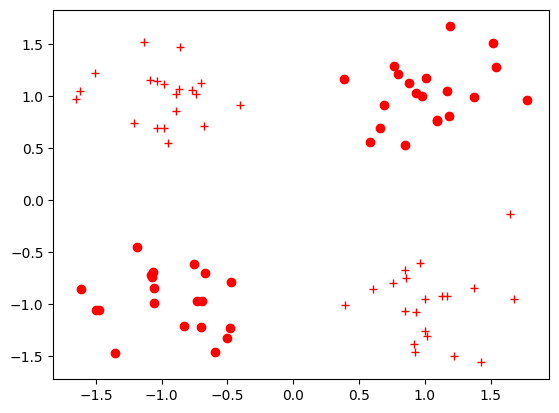

In [65]:
 # 신경망 모델 구현
 import torch
 import numpy
 from sklearn.datasets import make_blobs
 import matplotlib.pyplot as plt
 import torch.nn.functional as F

 # y_train은 군집의 레이블로 (0,1,2,3)중 하나의 값을 가진다 (80, ) 모양
 n_dim = 2
 x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,
                               centers=[[1,1], [-1,-1], [1,-1], [-1,1]], cluster_std=0.3, shuffle=True)
 x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,
                               centers=[[1,1], [-1,-1], [1,-1], [-1,1]], cluster_std=0.3, shuffle=True)
 print(x_train.shape, y_train.shape)
 print(x_test.shape, y_test.shape)


 # 4개 레이블을 2개로 합치는 함수
 def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
      y[y_ == f] = to_
    return y
 y_train = label_map(y_train, [0,1], 0)
 y_train = label_map(y_train, [2,3], 1)
 y_test = label_map(y_test, [0,1], 0)
 y_test = label_map(y_test, [2,3], 1)

  # matplotlib로 시각화
 def vis_data(x, y=None, c='r'):
  if y is None:
    y = [None] * len(x)
  for x_, y_ in zip(x, y): # x와 y의 각 데이터 포인트(x_)와 레이블(y_)을 하나씩 처리.
    if y_ is None:
      plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
    else:
      plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

 #plt.figure()
 vis_data(x_train, y_train)
 #plt.show()



 # 넘파이 벡터 형식을 파이토치의 텐서로 변환
 x_train = torch.FloatTensor(x_train)
 x_test = torch.FloatTensor(x_test)
 y_train = torch.FloatTensor(y_train)
 y_test = torch.FloatTensor(y_test)






 # 신경망 모델 구현  nn.Module을 상속받음
 class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        #입력된 데이터가 신경망을 통과하며 거치는 연산 정의
        # Linear()는 행렬곱과 편향을 포함하는 연산을 지원하는 객체를 반환
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor) # [1, hidden_size]형의 텐서를 반환
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output



 # 객체 사용
 model = NeuralNet(2, 5)
 learning_rate = 0.03
 criterion = torch.nn.BCELoss() # 이진 교차 엔트로피 오차

 epochs = 2000
 # 학습에 사용할 최적화 알고리즘 (.step()을 호출해 가중치 갱신)
 optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

 model.eval()
 test_loss_before = criterion(model(x_test).squeeze(), y_test)
 print('test loss before training = {}'.format(test_loss_before.item()))

 # 학습
 for epoch in range(epochs):
    model.train()
    optimizer.zero_grad() # 이폭마다 새로운 경삿값을 계산하므로

    train_output = model(x_train)

    train_loss = criterion(train_output.squeeze(), y_train)

    if epoch%100 == 0:
        #print('epoch: {}, train loss: {}'.format(epoch, train_loss.item()))
        print(' ')
    # 오차 함수를 가중치로 미분하여 오차가 최소가 되는 방향을 구하고
    #  그 방향으로 모델을 학습률만큼 이동 (즉, 역전파 부분)
    train_loss.backward()
    optimizer.step()


 model.eval()
 test_loss_after = criterion(torch.squeeze(model(x_test)), y_test)
 print('test loss after training = {}'.format(test_loss_after.item()))

 # 학습된 모델을 저장
 torch.save(model.state_dict(), './model.pt')
 print('state_dict format. of the model: {}'
        .format(model.state_dict()))

 new_model = NeuralNet(2, 5)
 new_model.load_state_dict(torch.load('./model.pt'))
